# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

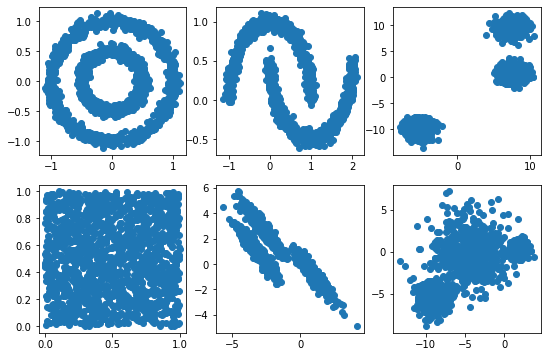

In [69]:
fig, ax = plt.subplots(2,3, figsize=(9,6))

ax[0,0].scatter(A[:,0],A[:,1])
ax[0,1].scatter(B[:,0],B[:,1])
ax[0,2].scatter(C[:,0],C[:,1])
ax[1,0].scatter(D[:,0],D[:,1])
ax[1,1].scatter(E[:,0],E[:,1])
ax[1,2].scatter(F[:,0],F[:,1])


## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

### Lösung 2.1 und 2.2

In [24]:
from sklearn.cluster import KMeans

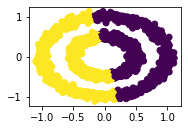

In [67]:
#Alternative Variante
A_pred = KMeans(n_clusters=2, random_state=0).fit_predict(A)

plt.subplot(221)
plt.scatter(A[:, 0], A[:, 1], c=A_pred)

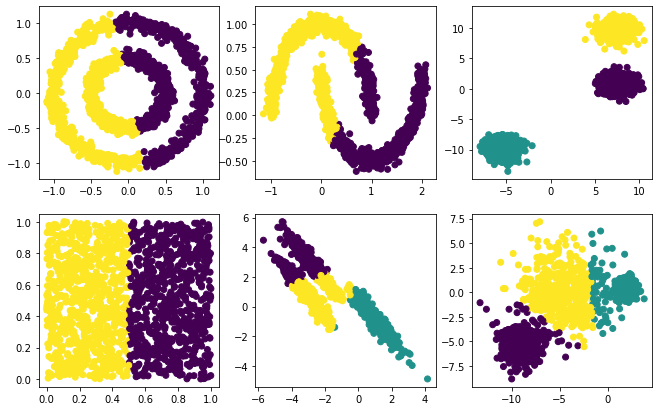

In [72]:
from sklearn.cluster import KMeans
kmeansA = KMeans(n_clusters=2, random_state=0).fit(A)
kmeansB = KMeans(n_clusters=2, random_state=0).fit(B)
kmeansC = KMeans(n_clusters=3, random_state=0).fit(C)
kmeansD = KMeans(n_clusters=2, random_state=0).fit(D)
kmeansE = KMeans(n_clusters=3, random_state=0).fit(E)
kmeansF = KMeans(n_clusters=3, random_state=0).fit(F)

#plot again, now with lable coloring
fig, axes = plt.subplots(2,3,figsize=(11,7))
axes[0, 0].scatter(A[:,0], A[:,1], c=kmeansA.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=kmeansB.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=kmeansC.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=kmeansD.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=kmeansE.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=kmeansF.labels_)

### Lösung 2.3

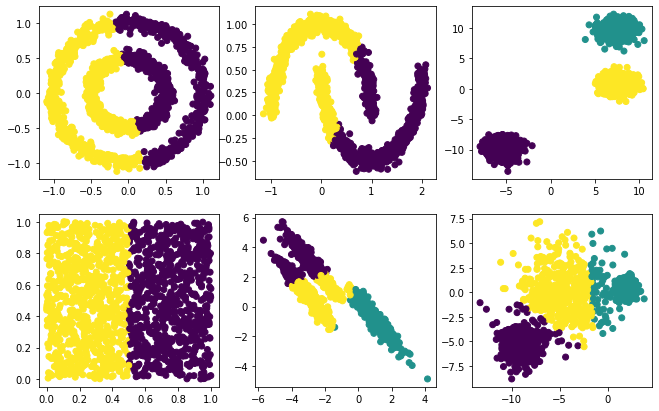

In [71]:
kmeansA = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(A)
kmeansB = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(B)
kmeansC = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(C)
kmeansD = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(D)
kmeansE = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(E)
kmeansF = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(F)

#plot again, now with lable coloring
fig, axes = plt.subplots(2,3,figsize=(11,7))
axes[0, 0].scatter(A[:,0], A[:,1], c=kmeansA.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=kmeansB.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=kmeansC.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=kmeansD.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=kmeansE.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=kmeansF.labels_)


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


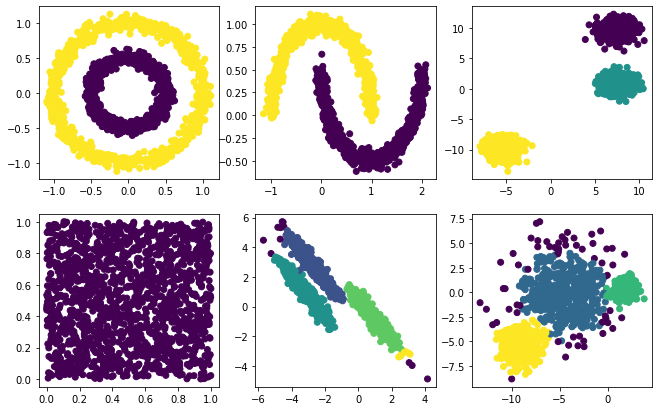

In [108]:
from sklearn.cluster import DBSCAN
db_A = DBSCAN(min_samples=2, eps=0.2).fit(A)
db_B = DBSCAN(min_samples=2, eps=0.2).fit(B)
db_C = DBSCAN(min_samples=5, eps=1.5).fit(C)
db_D = DBSCAN(min_samples=2, eps=0.5).fit(D)
db_E = DBSCAN(min_samples=4, eps=0.3).fit(E) 
db_F = DBSCAN(min_samples=10, eps=0.9).fit(F) 

fig, axes = plt.subplots(2, 3,figsize=(11,7))
axes[0, 0].scatter(A[:,0], A[:,1], c=db_A.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=db_B.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=db_C.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=db_D.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=db_E.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=db_F.labels_)